In [8]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..')

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Import self-made modules
from project1_code.linear_model import LinearModel
from project1_code.make_and_prepare_data import FrankeFunction, create_design_matrix
from project1_code.model_selection import R2, MSE, cross_validation

# Import plotting functions
from project1_code.plotting import plot_mse_per_poldegree, plot_R2_per_poldegree

In [9]:
# Choose hyperparameters for model
pol_degree = 5
data_size = 600
test_size = 0.2
error_std = 0.1

In [10]:
# Make data
np.random.seed(5)
x = np.random.uniform(0, 1, data_size)
y = np.random.uniform(0, 1, data_size)

z = FrankeFunction(x, y) + np.random.normal(loc=0, scale=error_std)

In [11]:
# Define empty list in which to store the MSE
mses_test = []
mses_train = []

X = create_design_matrix(x, y, pol_degree)

# Test for 5 - 10 folds
for i in range(5, 11):
    model = LinearModel()
    mse_test, mse_train = cross_validation(model,X, z, i)
    mses_test.append(mse_test)
    mses_train.append(mse_train)

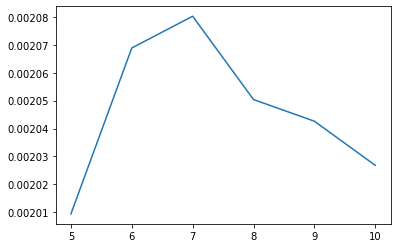

In [15]:
plt.plot(range(5, 11), mses_test)
#plt.plot(range(5, 11), mses_train)

In [13]:
mses_test

[0.0020093814174097883,
 0.0020688820576732713,
 0.002080260907639547,
 0.002050384059895176,
 0.00204262193373561,
 0.0020267997230801844]

In [7]:
lr_sk = LinearRegression()

for i in range(5, 11):
    scores = cross_val_score(lr_sk, X, z, cv=i, scoring='neg_mean_squared_error')
    print(-np.mean(scores))

0.002204299525978682
0.002214372569148536
0.0021734672453555784
0.00218710183927603
0.0021130069008207237
0.0022120719768820214
